In [21]:
# Import all libraries and dependencies
import pandas as pd
import os
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.figure as figure

from BRICS_Helper import Helper as helper

### This section is to set defualt options for pandas and other libraries

In [22]:
# Set default options for pandas and other libraries
pd.set_option('display.max_colwidth', None)

### This section is to set global variables that will be used throughout the project

In [23]:
start_year = 2010
end_year = 2019

### This section is to define common functions

In [24]:
# Function to return dataframe based on start_year and end_year
def fn_df_year_filter(df, start_year, end_year):
    return df[(df['Year'] >= start_year) & (df['Year'] <= end_year)].reset_index(drop=True)

def fn_df_set_data_types(df):
    return df.astype({'Country_Name': 'string',
                      'Country_Code': 'string',
                      'Series_Name': 'string',
                      'Series_Code': 'string',
                      'Year': 'int'})

### This section is to read the source files and store in corresponding dataframes

In [25]:
# Import Excel files
economy_raw_df = pd.read_excel("../Resources/BRICS Economic Data.xlsx", sheet_name="Data")
education_environment_raw_df = pd.read_excel("../Resources/BRICS Education and Environment Data.xlsx", sheet_name="Data")
health_poverty_raw_df = pd.read_excel("../Resources/BRICS Health and Poverty Data.xlsx", sheet_name="Data")
private_sector_raw_df = pd.read_excel("../Resources/BRICS Private Sector Data.xlsx", sheet_name="Data")
public_sector_raw_df = pd.read_excel("../Resources/BRICS Public Sector and Society Data.xlsx", sheet_name="Data")

### This section is to study the dataframes and find the usable size of data

In [26]:
# Study the dataframes and understand the data

df_shapes = {
    'dataframe': ['economy', 'education_environment', 'health_poverty', 'private_sector', 'public_sector'],
    'shape': [economy_raw_df.shape, education_environment_raw_df.shape, health_poverty_raw_df.shape, private_sector_raw_df.shape, public_sector_raw_df.shape],
    'total_nans': [economy_raw_df.isna().sum().sum(), education_environment_raw_df.isna().sum().sum(), health_poverty_raw_df.isna().sum().sum(), private_sector_raw_df.isna().sum().sum(), public_sector_raw_df.isna().sum().sum()]
}

df_shapes = pd.DataFrame(df_shapes)

df_shapes

,dataframe,shape,total_nans
0,economy,"(1730, 55)",26550
1,education_environment,"(1430, 55)",41592
2,health_poverty,"(1390, 55)",38949
3,private_sector,"(845, 55)",25124
4,public_sector,"(1600, 55)",54804


In [27]:
# Modify the column names (Here we are targeting only the year column). We might need to mofdify more columns in the future
economy_raw_df.columns = helper.year_col_name(economy_raw_df.columns)
education_environment_raw_df.columns = helper.year_col_name(education_environment_raw_df.columns)
health_poverty_raw_df.columns = helper.year_col_name(health_poverty_raw_df.columns)
private_sector_raw_df.columns = helper.year_col_name(private_sector_raw_df.columns)
public_sector_raw_df.columns = helper.year_col_name(public_sector_raw_df.columns)

#

In [28]:
# Using melt function here to unpivot the dataframes
economy_melted_df = economy_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')
education_environment_melted_df = education_environment_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')
health_poverty_melted_df = health_poverty_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')
private_sector_melted_df = private_sector_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')
public_sector_melted_df = public_sector_raw_df.melt(id_vars=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code'], var_name='Year', value_name='Value')

# Preview the dataframes
display(economy_melted_df.head(1))
display(education_environment_melted_df.head(1))
display(health_poverty_melted_df.head(1))
display(private_sector_melted_df.head(1))
display(public_sector_melted_df.head(1))

,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,1970,NaN


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,1970,NaN


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1970,77.1184


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Agricultural raw materials exports (% of merchandise exports),TX.VAL.AGRI.ZS.UN,1970,11.895098


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Adequacy of social insurance programs (% of total welfare of beneficiary households),per_si_allsi.adq_pop_tot,1970,NaN


In [29]:
display(economy_melted_df.isna().sum())
display(education_environment_melted_df.isna().sum())
display(health_poverty_melted_df.isna().sum())
display(private_sector_melted_df.isna().sum())
display(public_sector_melted_df.isna().sum())

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           26532
dtype: int64

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           41574
dtype: int64

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           38931
dtype: int64

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           25106
dtype: int64

Country_Name      153
Country_Code      255
Series_Name       255
Series_Code       255
Year                0
Value           54786
dtype: int64

#

### This section is to modify the data and finalize the dataframes to proceed with our analysis

In [30]:


# Drop all NaN values
economy_modified_df = economy_melted_df.dropna()
education_environment_modified_df = education_environment_melted_df.dropna()
health_poverty_modified_df = health_poverty_melted_df.dropna()
private_sector_modified_df = private_sector_melted_df.dropna()
public_sector_modified_df = public_sector_melted_df.dropna()

# Modify data types for all dataframes
economy_modified_df = fn_df_set_data_types(economy_modified_df)
education_environment_modified_df = fn_df_set_data_types(education_environment_modified_df)
health_poverty_modified_df = fn_df_set_data_types(health_poverty_modified_df)
private_sector_modified_df = fn_df_set_data_types(private_sector_modified_df)
public_sector_modified_df = fn_df_set_data_types(public_sector_modified_df)

In [31]:
# Restrict dataframes last n years of data
economy_final_df = fn_df_year_filter(economy_modified_df, start_year, end_year)
education_environment_final_df = fn_df_year_filter(education_environment_modified_df, start_year, end_year)
health_poverty_final_df = fn_df_year_filter(health_poverty_modified_df, start_year, end_year)
private_sector_final_df = fn_df_year_filter(private_sector_modified_df, start_year, end_year)
public_sector_final_df = fn_df_year_filter(public_sector_modified_df, start_year, end_year)

display(economy_final_df.info())
display(education_environment_final_df.info())
display(health_poverty_final_df.info())
display(private_sector_final_df.info())
display(public_sector_final_df.info())

display(economy_final_df.head(1))
display(education_environment_final_df.head(1))
display(health_poverty_final_df.head(1))
display(private_sector_final_df.head(1))
display(public_sector_final_df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14912 entries, 0 to 14911
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  14912 non-null  string 
 1   Country_Code  14912 non-null  string 
 2   Series_Name   14912 non-null  string 
 3   Series_Code   14912 non-null  string 
 4   Year          14912 non-null  int64  
 5   Value         14912 non-null  float64
dtypes: float64(1), int64(1), string(4)
memory usage: 699.1 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  7299 non-null   string 
 1   Country_Code  7299 non-null   string 
 2   Series_Name   7299 non-null   string 
 3   Series_Code   7299 non-null   string 
 4   Year          7299 non-null   int64  
 5   Value         7299 non-null   float64
dtypes: float64(1), int64(1), string(4)
memory usage: 342.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  8805 non-null   string 
 1   Country_Code  8805 non-null   string 
 2   Series_Name   8805 non-null   string 
 3   Series_Code   8805 non-null   string 
 4   Year          8805 non-null   int64  
 5   Value         8805 non-null   float64
dtypes: float64(1), int64(1), string(4)
memory usage: 412.9 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  6234 non-null   string 
 1   Country_Code  6234 non-null   string 
 2   Series_Name   6234 non-null   string 
 3   Series_Code   6234 non-null   string 
 4   Year          6234 non-null   int64  
 5   Value         6234 non-null   float64
dtypes: float64(1), int64(1), string(4)
memory usage: 292.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9625 entries, 0 to 9624
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  9625 non-null   string 
 1   Country_Code  9625 non-null   string 
 2   Series_Name   9625 non-null   string 
 3   Series_Code   9625 non-null   string 
 4   Year          9625 non-null   int64  
 5   Value         9625 non-null   float64
dtypes: float64(1), int64(1), string(4)
memory usage: 451.3 KB


None

,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,2010,5.155433


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,2010,94.0


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,2010,66.8926


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,Agricultural raw materials exports (% of merchandise exports),TX.VAL.AGRI.ZS.UN,2010,3.88294


,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Brazil,BRA,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2010,1302.474648


### This section is to concat dataframes and create mapping dictionaries

In [32]:
# Concat all dataframes and collect global data

merged_all_df = pd.concat([economy_final_df, education_environment_final_df, health_poverty_final_df, private_sector_final_df, public_sector_final_df])

# Series dictionary to map Series_Code to Series_Name
dict_series = dict(merged_all_df[['Series_Code', 'Series_Name']].drop_duplicates().reset_index(drop=True).values)

# Countries dictionary to map Country_Code to Country_Name
dict_countries = dict(merged_all_df[['Country_Code', 'Country_Name']].drop_duplicates().reset_index(drop=True).values)

### Series used in this project for analysis

### Economy
* NY.ADJ.NNTY.KD.ZG -> Adjusted net national income (annual % growth)
* EG.ELC.ACCS.ZS -> Access to electricity (% of population)
* SL.IND.EMPL.ZS -> Employment in industry and services (% of total employment)
* SL.AGR.EMPL.ZS -> Employment in agriculture (% of total employment)

### Health & Poverty
* SH.XPD.CHEX.GD.ZS -> Current health expenditure (% of GDP)
* SH.DYN.MORT -> Mortality rate, under-5 (per 1,000 live births)
* SP.DYN.LE00.IN -> Life expectancy at birth, total (years)
### Private & Public Sectors
* NE.EXP.GNFS.ZS -> Exports of goods and services (% of GDP)
* TX.VAL.AGRI.ZS.UN -> Agriculture raw materials exports (% of merchandise exports)

### Education & Environment
* EG.ELC.RNWX.ZS -> Renewable Energy (% of total)
* EG.ELC.FOSL.ZS -> Fossil Fuels (% of total)
* SE.ADT.LITR.ZS -> Literacy rate, adult total (% of people ages 15 and above)
* SP.RUR.TOTL.ZS -> Rural population (% of total population)
* SL.IND.EMPL.ZS -> Urban population (% of total population)

In [33]:
all_series_correlation = merged_all_df.loc[
                                            (merged_all_df['Series_Code'] == 'SH.XPD.CHEX.GD.ZS')\
                                            | (merged_all_df['Series_Code'] == 'SH.DYN.MORT')\
                                            | (merged_all_df['Series_Code'] == 'SP.DYN.LE00.IN')\
                                            | (merged_all_df['Series_Code'] == 'NE.EXP.GNFS.ZS')\
                                            | (merged_all_df['Series_Code'] == 'TX.VAL.AGRI.ZS.UN')\
                                            | (merged_all_df['Series_Code'] == 'EG.ELC.RNWX.ZS')\
                                            | (merged_all_df['Series_Code'] == 'EG.ELC.HYRO.ZS')\
                                            | (merged_all_df['Series_Code'] == 'EG.ELC.FOSL.ZS')\
                                            | (merged_all_df['Series_Code'] == 'EG.ELC.ACCS.ZS')\
                                            | (merged_all_df['Series_Code'] == 'SE.ADT.LITR.ZS')\
                                            | (merged_all_df['Series_Code'] == 'SP.RUR.TOTL.ZS')\
                                            | (merged_all_df['Series_Code'] == 'SL.IND.EMPL.ZS')\
                                            | (merged_all_df['Series_Code'] == 'SL.SRV.EMPL.ZS')\
                                            | (merged_all_df['Series_Code'] == 'SL.AGR.EMPL.ZS')\
                                            | (merged_all_df['Series_Code'] == 'SP.URB.TOTL.IN.ZS')\
                                          ]\
                                            .reset_index(drop=True)

all_series_correlation = all_series_correlation.pivot(index=['Country_Code', 'Year'], columns="Series_Code", values="Value")

all_series_correlation = all_series_correlation.reset_index()

all_series_correlation.head()

Series_Code,Country_Code,Year,EG.ELC.ACCS.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.RNWX.ZS,NE.EXP.GNFS.ZS,SE.ADT.LITR.ZS,SH.DYN.MORT,SH.XPD.CHEX.GD.ZS,SL.AGR.EMPL.ZS,SL.IND.EMPL.ZS,SL.SRV.EMPL.ZS,SP.DYN.LE00.IN,SP.RUR.TOTL.ZS,SP.URB.TOTL.IN.ZS,TX.VAL.AGRI.ZS.UN
0,BRA,2010,99.352173,12.385578,78.195426,6.528808,10.865585,90.379181,18.6,7.945160,12.66,22.559999,64.779999,73.619,15.665,84.335,3.882940
1,BRA,2011,99.328691,9.829678,80.550515,6.570482,11.582513,91.411240,17.9,7.788195,11.99,22.309999,65.699997,73.921,15.369,84.631,3.565907
2,BRA,2012,99.519494,14.598353,75.158155,7.290129,11.877539,91.337852,17.2,7.736377,11.47,23.020000,65.510002,74.209,15.077,84.923,3.842070
3,BRA,2013,99.575151,20.546108,68.463446,8.225762,11.742231,91.484238,16.7,7.976600,11.17,22.950001,65.889999,74.483,14.791,85.209,3.679592
4,BRA,2014,99.650247,24.253239,63.224984,9.857090,11.011943,91.729431,16.3,8.396446,10.34,22.889999,66.769997,74.745,14.508,85.492,4.099105


### Use Case 1 : Current health expenditure (% of GDP) vs Mortality rate, under-5 (per 1,000 live births)
* Current health expenditure (% of GDP) and mortality rate, under-5 (per 1,000 live births) are two critical indicators that provide insights into a country’s          healthcare system and overall child health outcomes.
* Current Health Expenditure (% of GDP) measures the total amount of money spent on health services and goods as a percentage of a country’s GDP. It includes expenditures on hospitals, clinics, pharmaceuticals, and other health-related services, both public and private
* Mortality Rate, Under-5 (per 1,000 Live Births) measures the probability that a newborn will die before reaching the age of five, expressed per 1,000 live births2.


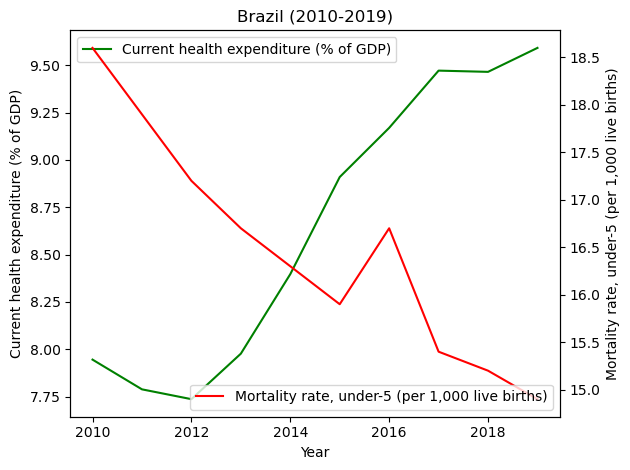

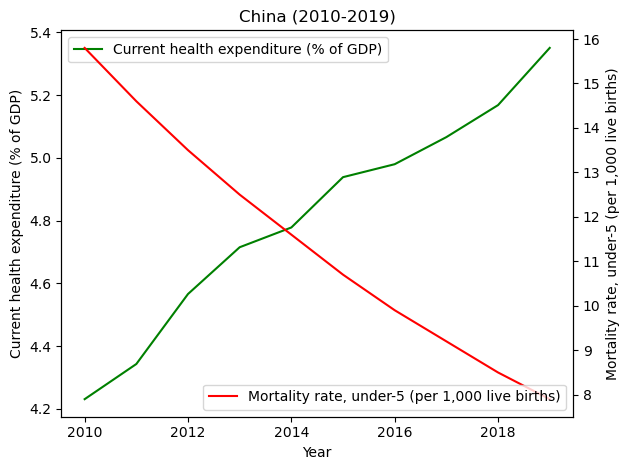

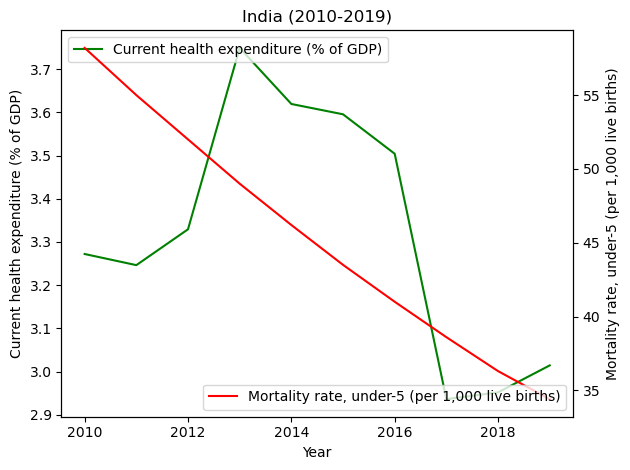

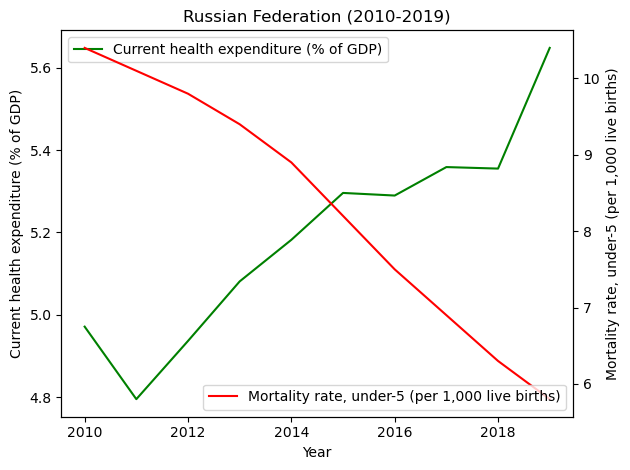

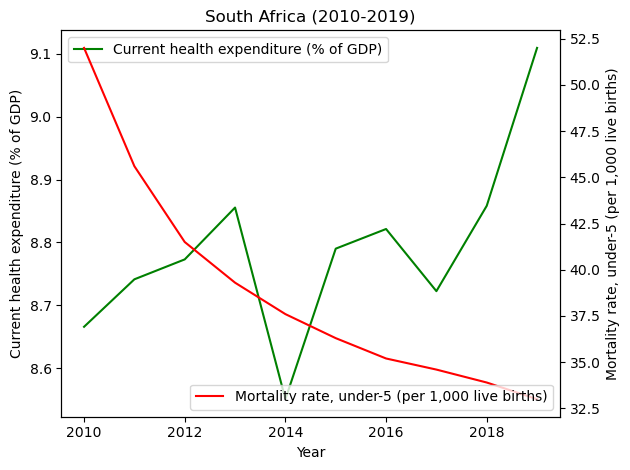

In [34]:
# Current health expenditure (% of GDP) vs Mortality rate, under-5 (per 1,000 live births)
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.plot(country_data['Year'], country_data['SH.XPD.CHEX.GD.ZS'], label=f'{dict_series['SH.XPD.CHEX.GD.ZS']}', color='g')
    ax2.plot(country_data['Year'], country_data['SH.DYN.MORT'], label=f'{dict_series['SH.DYN.MORT']}', color='r')

    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{dict_series['SH.XPD.CHEX.GD.ZS']}')
    ax2.set_ylabel(f'{dict_series['SH.DYN.MORT']}')

    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')

    plt.title(f'{dict_countries[country]} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()

* ### Use Case 2 : Current health expenditure (% of GDP) vs Life expectancy at birth, total (years)
    * Current health expenditure (% of GDP) and life expectancy at birth, total (years) are two important indicators that provide insights into a country’s healthcare system and overall population health.
    * Current Health Expenditure (% of GDP) measures the total amount of money spent on health services and goods as a percentage of a country’s GDP. It includes expenditures on hospitals, clinics, pharmaceuticals, and other health-related services, both public and private
    * Life expectancy at birth is the average number of years a newborn is expected to live if current mortality rates at the time of their birth remain unchanged throughout their life.


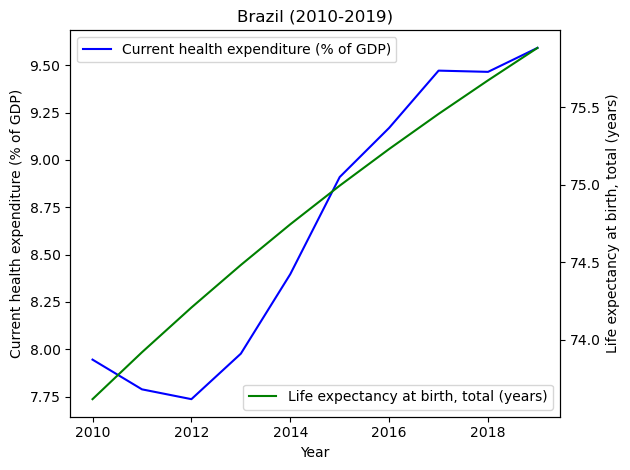

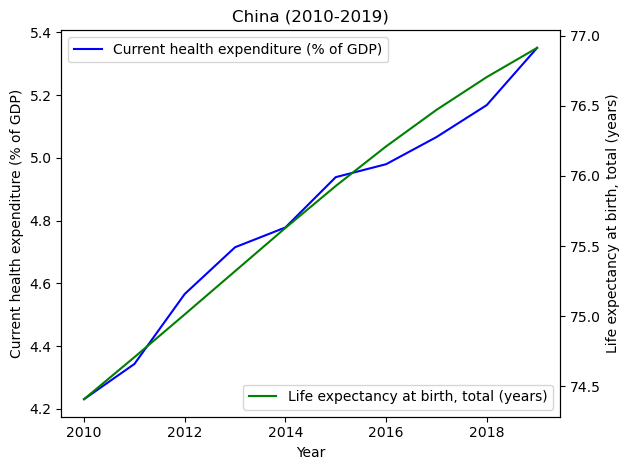

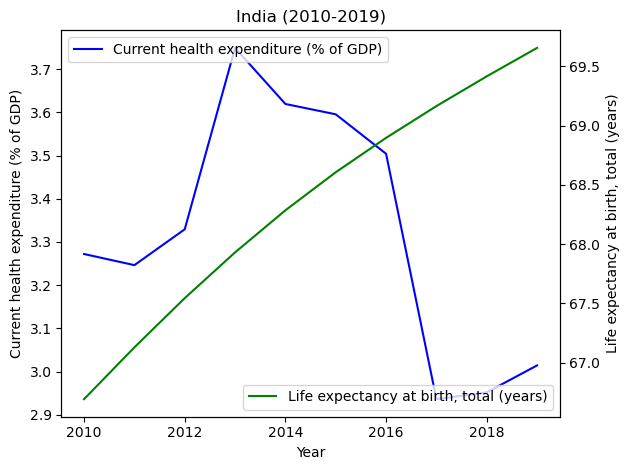

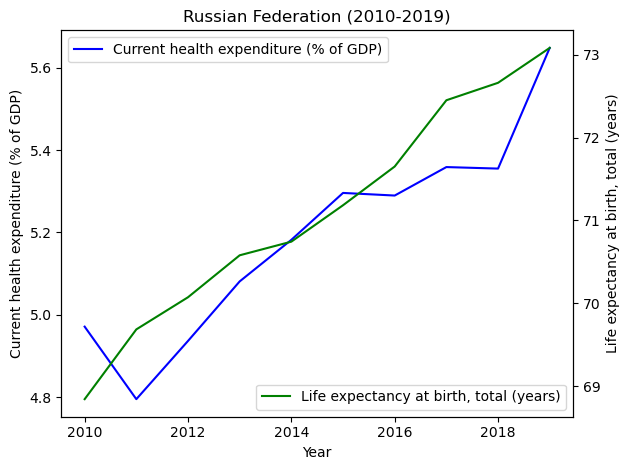

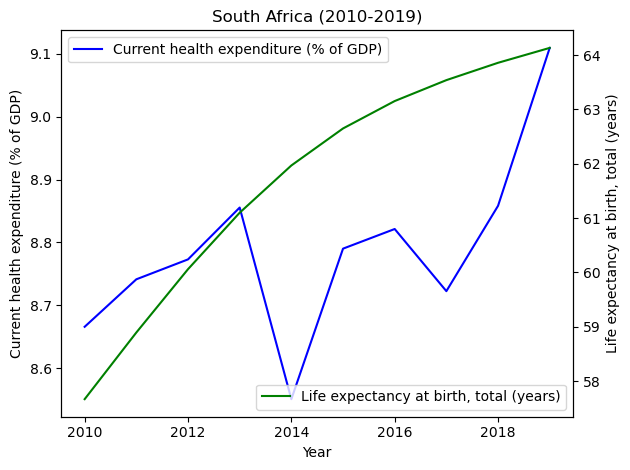

In [35]:
# Current health expenditure (% of GDP) vs Life expectancy at birth, total (years)
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['SH.XPD.CHEX.GD.ZS'], label=f'{dict_series['SH.XPD.CHEX.GD.ZS']}', color='b')
    ax2.plot(country_data['Year'], country_data['SP.DYN.LE00.IN'], label=f'{dict_series['SP.DYN.LE00.IN']}', color='g')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{dict_series['SH.XPD.CHEX.GD.ZS']}')
    ax2.set_ylabel(f'{dict_series['SP.DYN.LE00.IN']}')

    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'{dict_countries[country]} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()

* ### Use Case 3 : Exports of goods and services (% of GDP) vs Agriculture raw materials exports (% of merchandise exports)
    * Exports of goods and services (% of GDP) and agricultural raw materials exports (% of merchandise exports) are two important indicators that provide insights into a country’s trade dynamics and economic structure.
    * Exports of goods and services (% of GDP) metric measures the total value of all goods and services exported by a country as a percentage of its Gross Domestic Product (GDP). It reflects the importance of exports in the overall economy
    * Agriculture raw materials exports (% of merchandise exports) metric measures the value of agricultural raw materials exported as a percentage of the total value of merchandise exports. Agricultural raw materials include items such as raw cotton, wool, hides, skins, and other crude materials (excluding fuels)

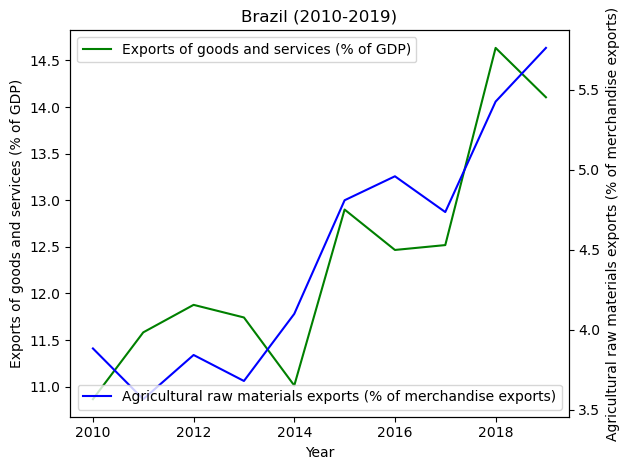

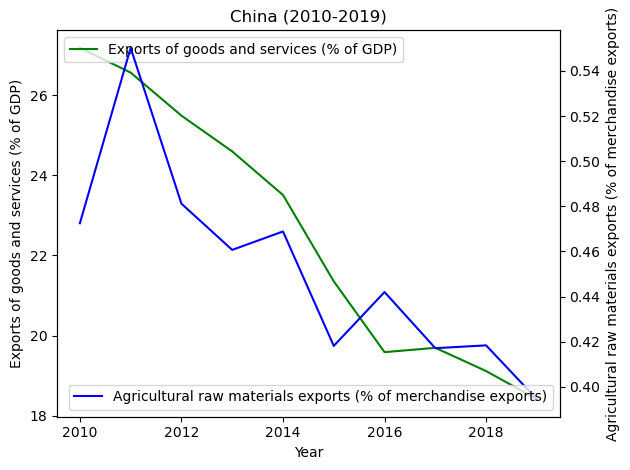

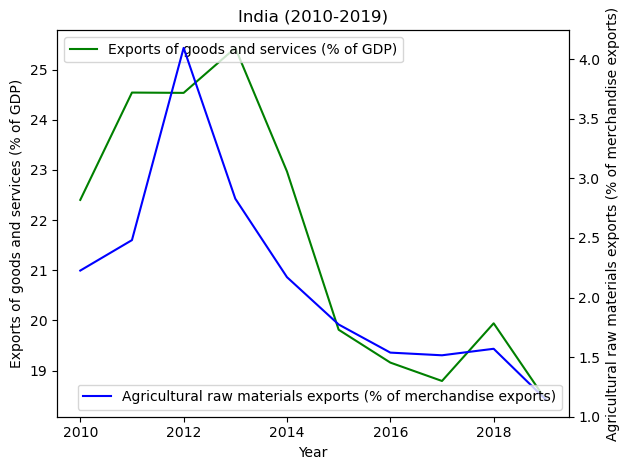

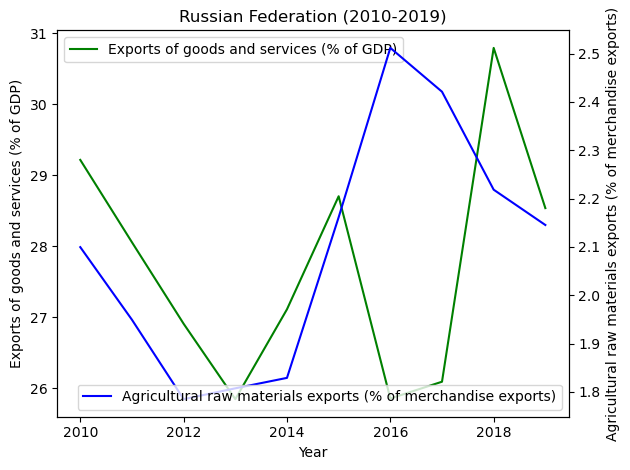

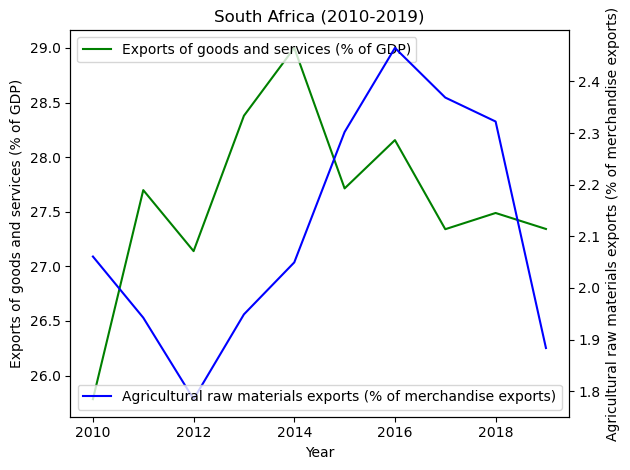

In [36]:
# Exports of goods and services (% of GDP) vs Agriculture raw materials exports (% of merchandise exports)
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['NE.EXP.GNFS.ZS'], label=f'{dict_series['NE.EXP.GNFS.ZS']}', color='g')
    ax2.plot(country_data['Year'], country_data['TX.VAL.AGRI.ZS.UN'], label=f'{dict_series['TX.VAL.AGRI.ZS.UN']}', color='b')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{dict_series['NE.EXP.GNFS.ZS']}')
    ax2.set_ylabel(f'{dict_series['TX.VAL.AGRI.ZS.UN']}')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'{dict_countries[country]} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()

* ### Use Case 4 : Renewable Energy (% of total) vs Fossil Fuels (% of total)
    * Renewable energy and fossil fuels are two primary sources of energy with distinct characteristics and impacts on the environment.
    * Renewable energy includes sources that are naturally replenished, such as solar, wind, hydro, geothermal, and biomass.
    * Fossil fuels include coal, oil, and natural gas, which are derived from ancient organic matter and are non-renewable.

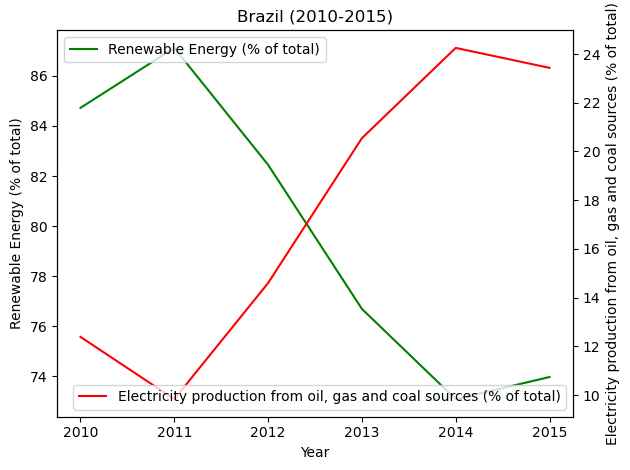

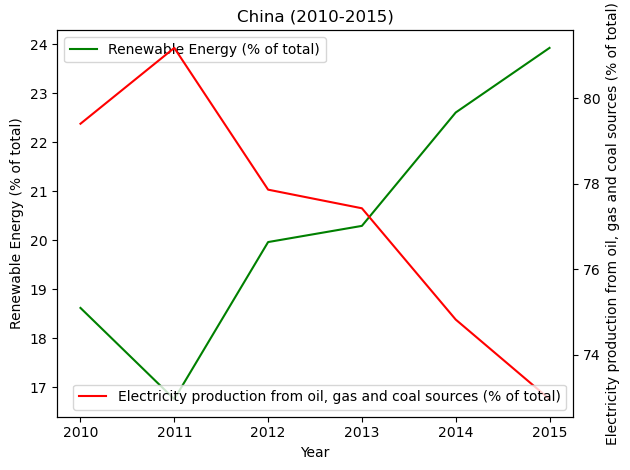

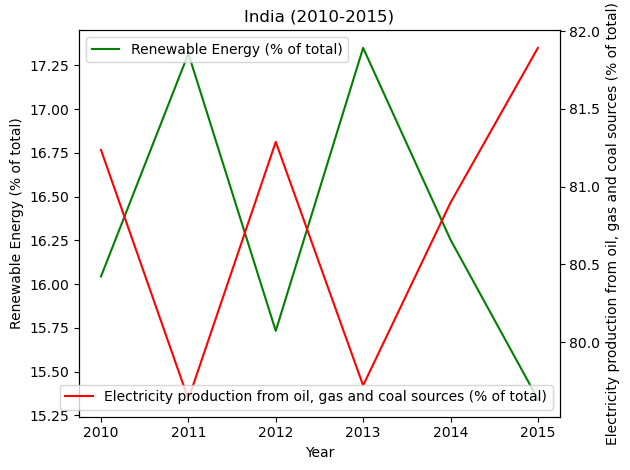

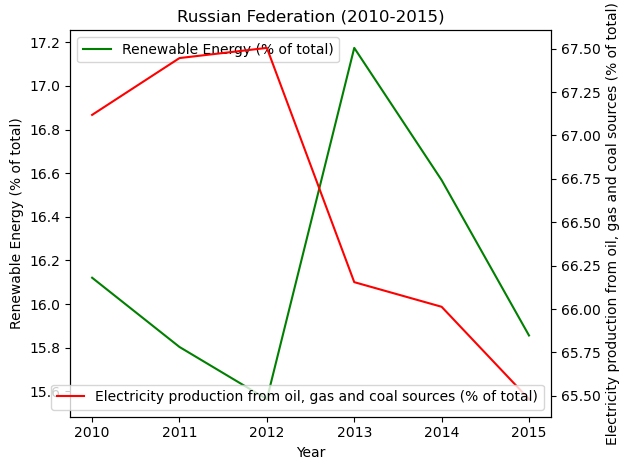

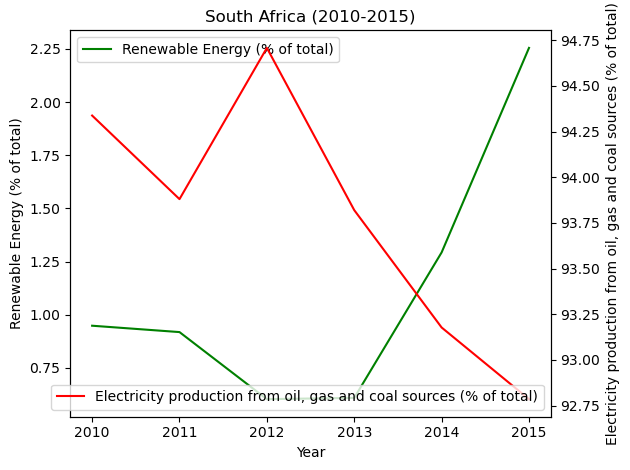

In [37]:
# Renewable Energy (% of total) vs Fossil Fuels (% of total)
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['EG.ELC.RNWX.ZS'] + country_data['EG.ELC.HYRO.ZS'], label='Renewable Energy (% of total)', color='g')
    ax2.plot(country_data['Year'], country_data['EG.ELC.FOSL.ZS'], label=f'{dict_series['EG.ELC.FOSL.ZS']}', color='r')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Renewable Energy (% of total)')
    ax2.set_ylabel(f'{dict_series['EG.ELC.FOSL.ZS']}')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'{dict_countries[country]} ({start_year}-2015)')

    plt.tight_layout()
    
    plt.show()

* ### Use Case 5 : Access to electricity (% of population) vs Literacy rate, adult total (% of people ages 15 and above)
    * Access to electricity (% of population) and literacy rate, adult total (% of people ages 15 and above) are two critical indicators that reflect a country’s development and quality of life
    * Access to electricity (% of population) metric measures the percentage of the population with access to electricity. It is a fundamental indicator of infrastructure development and quality of life
    * Literacy rate, adult total (% of people ages 15 and above) metric measures the percentage of people aged 15 and above who can read and write with understanding a short, simple statement about their everyday life3.


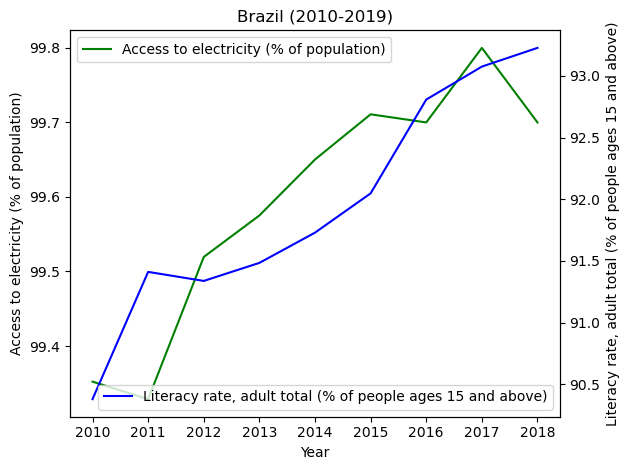

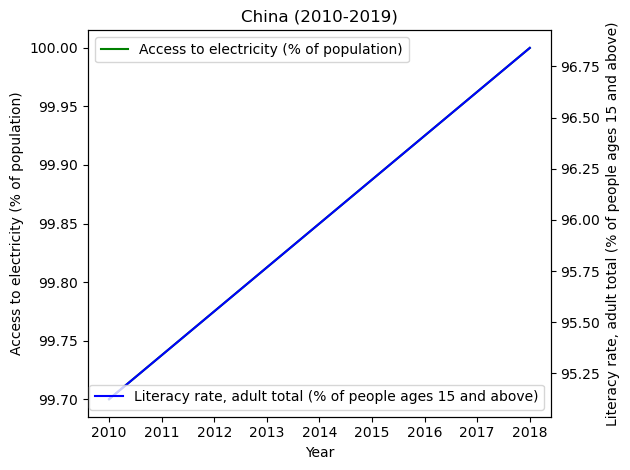

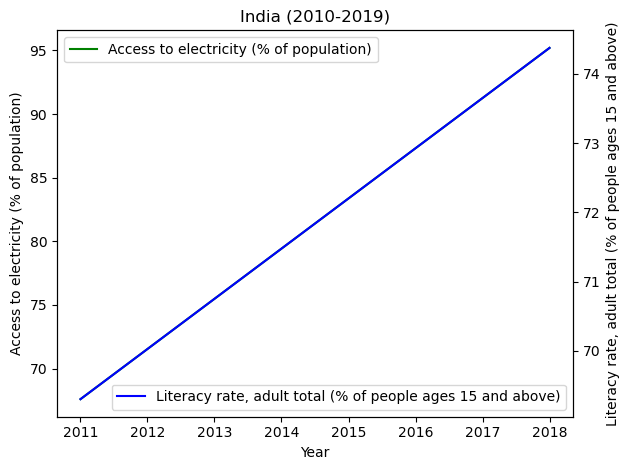

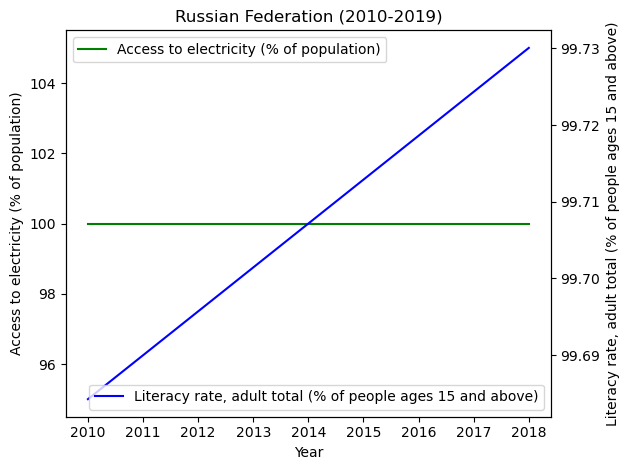

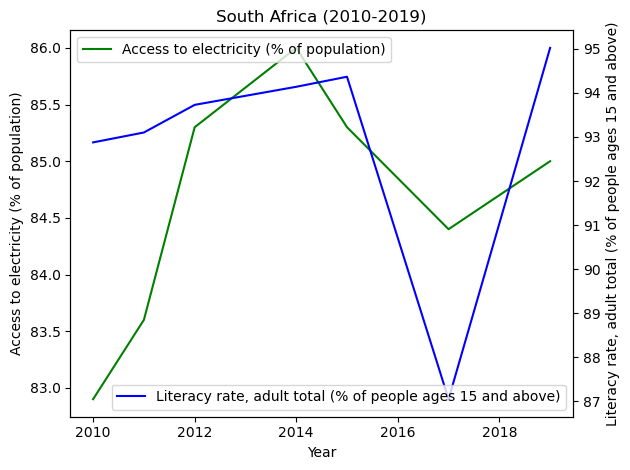

In [38]:
# Access to electricity (% of population) vs Literacy rate, adult total (% of people ages 15 and above)
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country][['Year', 'EG.ELC.ACCS.ZS', 'SE.ADT.LITR.ZS']].dropna()
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['EG.ELC.ACCS.ZS'], label=f'{dict_series['EG.ELC.ACCS.ZS']}', color='g')
    ax2.plot(country_data['Year'], country_data['SE.ADT.LITR.ZS'], label=f'{dict_series['SE.ADT.LITR.ZS']}', color='b')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{dict_series['EG.ELC.ACCS.ZS']}')
    ax2.set_ylabel(f'{dict_series['SE.ADT.LITR.ZS']}')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'{dict_countries[country]} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()

* ### Use Case 6 : Rural population (% of total population) vs Employment in industry and services (% of total employment)
    * Rural population (% of total population) and employment in industry and services (% of total employment) are two important indicators that provide insights into the demographic and economic structure of a country
    * Rural population (% of total population) metric measures the percentage of a country’s population living in rural areas, which are typically characterized by lower population density and smaller settlements compared to urban areas1.
    * Employment in industry and services (% of total employment) metric measures the proportion of the workforce employed in the industrial and service sectors. The industrial sector includes manufacturing, mining, construction, and utilities, while the service sector includes activities such as retail, hospitality, finance, healthcare, education, and professional services5.


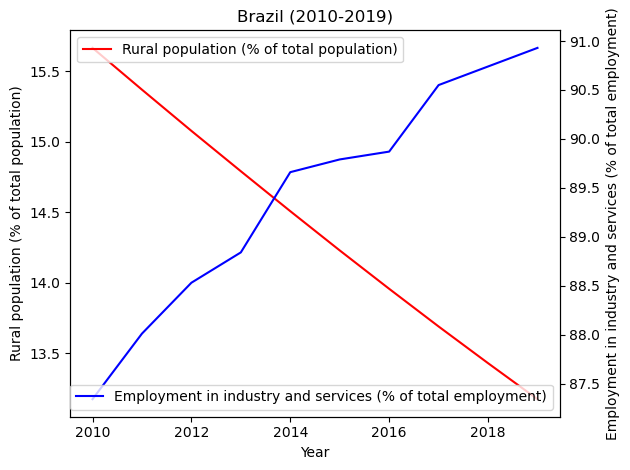

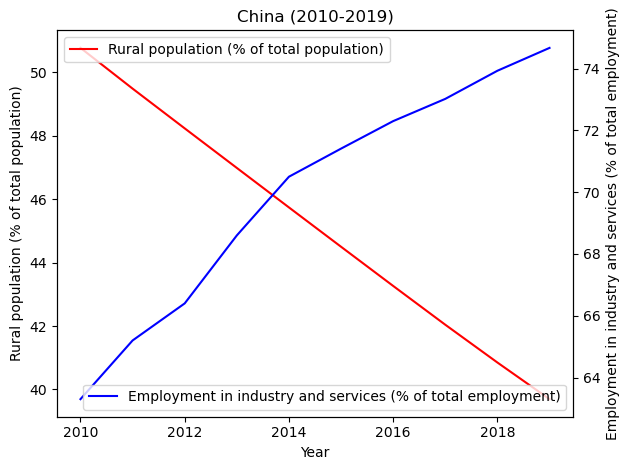

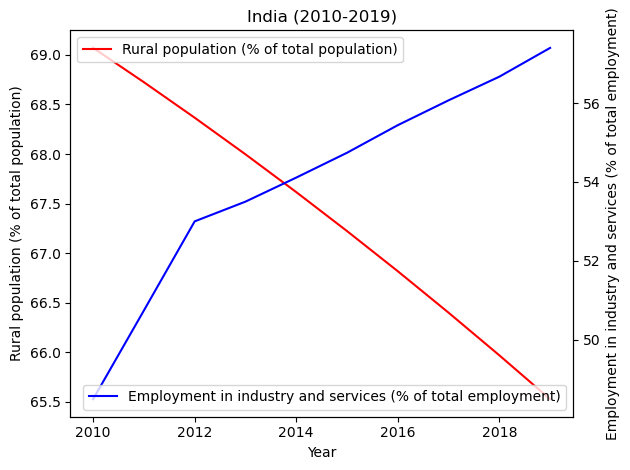

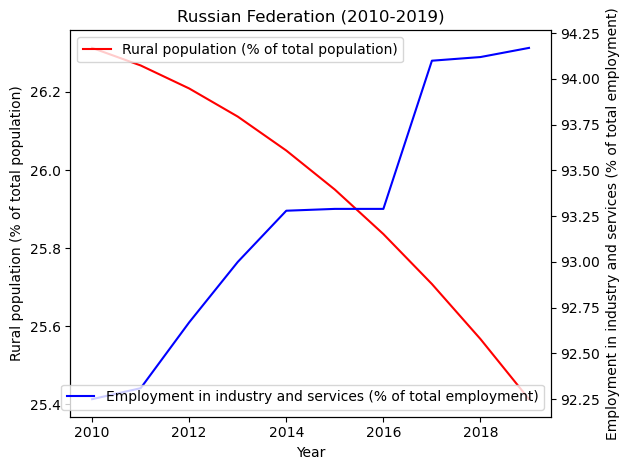

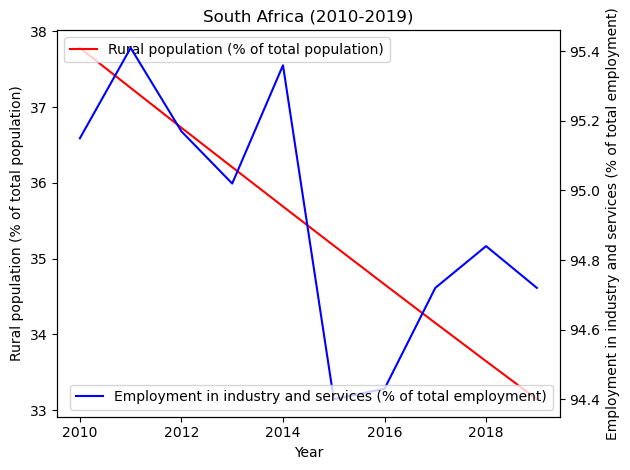

In [39]:
# Rural population (% of total population) vs Employment in industry and services (% of total employment)
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['SP.RUR.TOTL.ZS'], label=f'{dict_series['SP.RUR.TOTL.ZS']}', color='r')
    ax2.plot(country_data['Year'], country_data['SL.IND.EMPL.ZS'] + country_data['SL.SRV.EMPL.ZS'], label='Employment in industry and services (% of total employment)', color='b')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{dict_series['SP.RUR.TOTL.ZS']}')
    ax2.set_ylabel('Employment in industry and services (% of total employment)')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'{dict_countries[country]} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()

* ### Use Case 7 : Employment in agriculture (% of total employment) vs Urban population (% of total population)
    * Employment in agriculture (% of total employment) and urban population (% of total population) are two indicators that provide insights into the economic structure and demographic trends of a country
    * Employment in agriculture (% of total employment) metric measures the proportion of the workforce employed in the agricultural sector, which includes farming, forestry, fishing, and related activities1.
    * Urban population (% of total population) metric measures the percentage of a country’s population living in urban areas, which are characterized by higher population density and infrastructure compared to rural areas2.


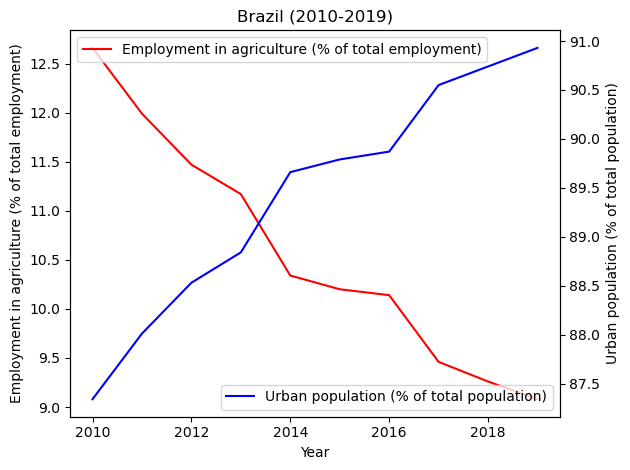

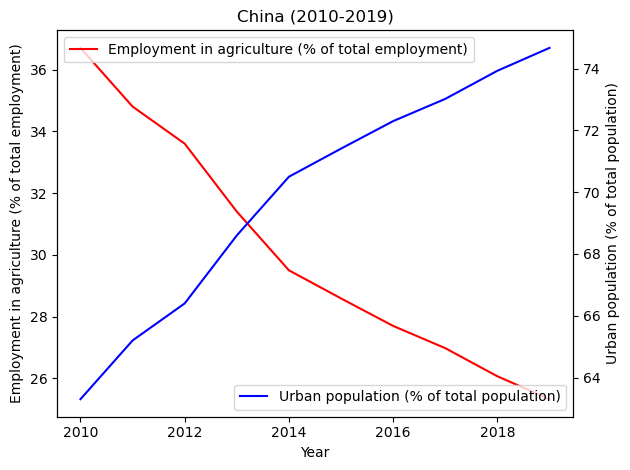

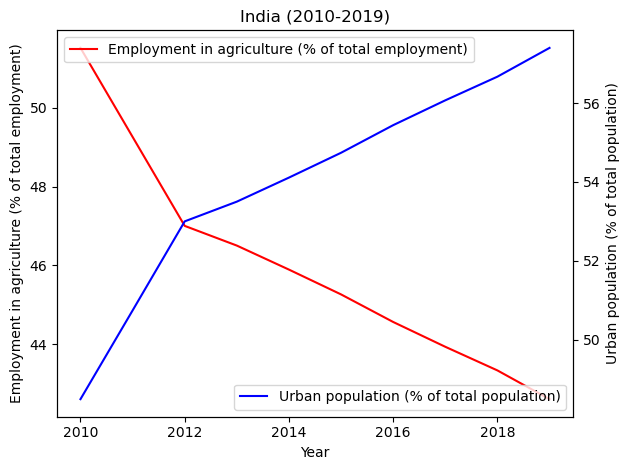

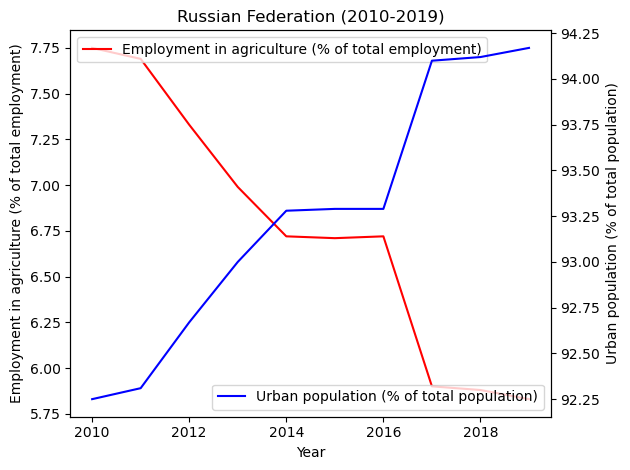

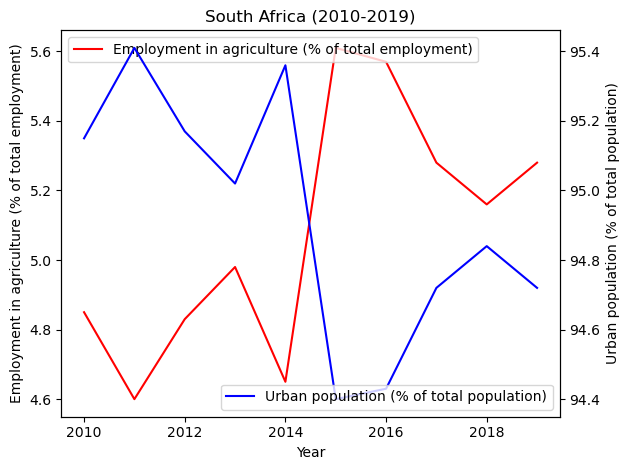

In [40]:
# Employment in agriculture (% of total employment) vs Urban population (% of total population)
for country in all_series_correlation['Country_Code'].unique():
    country_data = all_series_correlation.loc[all_series_correlation['Country_Code'] == country]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['SL.AGR.EMPL.ZS'], label='Employment in agriculture (% of total employment)', color='r')
    ax2.plot(country_data['Year'], country_data['SL.IND.EMPL.ZS'] + country_data['SL.SRV.EMPL.ZS'], label=f'{dict_series['SP.URB.TOTL.IN.ZS']}', color='b')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Employment in agriculture (% of total employment)')
    ax2.set_ylabel(f'{dict_series['SP.URB.TOTL.IN.ZS']}')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'{dict_countries[country]} ({start_year}-{end_year})')

    plt.tight_layout()
    
    plt.show()

### Observations

* **Use Case 1 :**  As the Current Health Expenditure decreases, the Mortality Rate under - 5 increased for almost all the countries.
* **Use Case 2 :** As the Current Health Expenditure increases, the life expectancy increased for almost all the countries.
* **Use Case 3 :** Both these metrics are directly proportionate with each other. As the Agriculture raw materials exports (% of merchandise exports) decreases, the overall xports of goods and services (% of GDP) decreases and as the Agriculture raw materials exports (% of merchandise exports) increases, the overall xports of goods and services (% of GDP) increases. The Agriculture raw materials exports (% of merchandise exports) plays a Vital role in overall xports of goods and services (% of GDP). 
* **Use Case 4 :** The Fossil Fuels production is inversely proportionate with the Renewable Energy. As the Renewable Energy increases, the Fossil Fuels decreases.
* **Use Case 5 :** As the Access to electricity (% of population) increases the literacy rate increases, and as the Access to electricity (% of population) decreases the literacy rate decreases
* **Use Case 6 :** As the Employment in industry and services (% of total employment) increases the Rural population (% of total population) decreases, and as the Employment in industry and services (% of total employment) decreases the Rural population (% of total population) increases. These both metrics are inversely proportional and inversely correlated
* **Use Case 7 :** As the Employment in agriculture (% of total employment) increases the Urban population (% of total population) decreases, and as the Employment in agriculture (% of total employment) decreases the Urban population (% of total population) increases. These both metrics are inversely proportional and inversely correlated


